# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
n = X[36000]

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

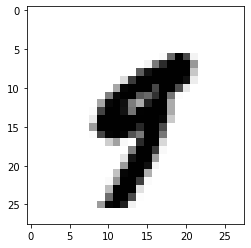

In [5]:
import matplotlib as plt
import matplotlib.pyplot

n = n.reshape(28,28)
matplotlib.pyplot.imshow(n, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
from sklearn.model_selection import train_test_split

X_train = X[0:60000]
y_train = y[0:60000]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_binary = [1 if n == '5' else 0 for n in y]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [11]:
logistic.fit(X_train, y_train)

C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_predict = logistic.predict(X_test)

### Does the classifier predict correctly the 36000th digit we picked before?

In [13]:
logistic.predict(X)[36000]

0

In [14]:
# it predited correctly

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [16]:
never_5_clf.fit(X_train,y_train)
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [17]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [18]:
confusion_matrix(y_test, logistic.predict(X_test))

array([[12611,   116],
       [  247,  1026]], dtype=int64)

In [19]:
confusion_matrix(y_test, never_5_clf.predict(X_test))

array([[12727,     0],
       [ 1273,     0]], dtype=int64)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

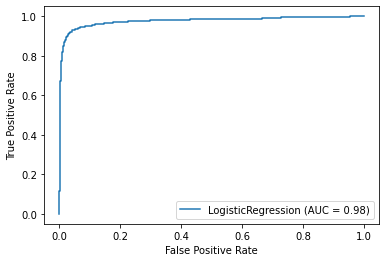

In [20]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

plot_roc_curve(logistic, X_test, y_test)

### Now find the roc_auc_score for each. 

In [22]:
roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])

0.9767152624598101

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

C:\Users\julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\julia\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


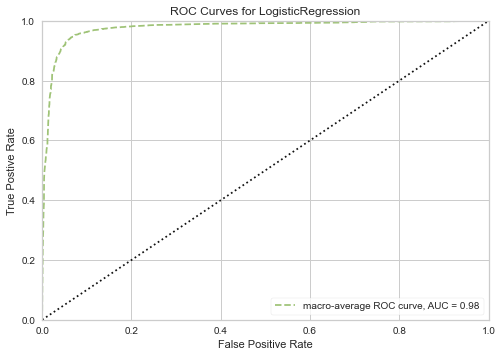

In [23]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC

model = LogisticRegression()
visualizer = ROCAUC(logistic, classes=["non-default", "default"], micro=False, per_class=False)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show()                   